# A 1 is coded as being extremely reasonable here!!!

In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

In [2]:
file_name_base = 'prob_slice_replaceable_comparisons'
mturk_version = 'MTURK_FIRST_'
full_base = mturk_version+file_name_base

In [3]:
answer_orders = pickle.load(open(full_base + '_answers_list.pickle','rb'))

In [4]:
mturk = pd.read_csv('Tail+Free+Sampling+Survey_October+16%2C+2019_07.21.zip')

In [5]:
mturk.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q22,Random ID,Q22 - Topics,Q22 - Parent Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",Thank you very much for completing this survey...,Random ID,Q22 - Topics,Q22 - Parent Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID21_2""}","{""ImportId"":""QID21_3""}","{""ImportId"":""QID21_4""}","{""ImportId"":""QID21_5""}","{""ImportId"":""QID21_6""}","{""ImportId"":""QID21_7""}","{""ImportId"":""QID26_TEXT""}","{""ImportId"":""Random ID""}","{""ImportId"":""QID26_TEXT_c25db21136a8433bb1f4d1...","{""ImportId"":""QID26_TEXT_c25db21136a8433bb1f4d1..."
2,2019-10-15 21:35:00,2019-10-15 21:35:13,1,NaN,100,13,1,2019-10-15 21:35:14,R_2X6WbTrQRtVcuAK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40022,NaN,NaN
3,2019-10-15 22:03:30,2019-10-15 22:08:53,0,107.145.113.42,100,322,1,2019-10-15 22:08:54,R_1KiQLFb92Exgwjx,NaN,...,1,2,5,4,1,1,NaN,99887,NaN,NaN
4,2019-10-15 22:18:07,2019-10-15 22:32:26,0,171.49.170.27,100,858,1,2019-10-15 22:32:26,R_3JjTvGYtgJEC5hD,NaN,...,3,3,2,4,5,2,i like to do this type of work in future,52503,Unknown,NaN


In [6]:
reverse_encoding_dict = {k:v for k, v in zip(np.arange(1,6,1), np.arange(5,0,-1))}
reverse_encoding_dict

{1: 5, 2: 4, 3: 3, 4: 2, 5: 1}

In [7]:
mturk.drop([0,1,2], axis=0, inplace=True)# dropping the first null response and the header details

In [8]:
mturk.reset_index(inplace=True)

In [9]:
mturk.loc[:, 'Q3_1':'Q21_7'] = mturk.loc[:, 'Q3_1':'Q21_7'].apply(lambda x: x.astype(int).map(reverse_encoding_dict))

In [10]:
mturk.head()

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q22,Random ID,Q22 - Topics,Q22 - Parent Topics
0,3,2019-10-15 22:03:30,2019-10-15 22:08:53,0,107.145.113.42,100,322,1,2019-10-15 22:08:54,R_1KiQLFb92Exgwjx,...,5,4,1,2,5,5,NaN,99887,NaN,NaN
1,4,2019-10-15 22:18:07,2019-10-15 22:32:26,0,171.49.170.27,100,858,1,2019-10-15 22:32:26,R_3JjTvGYtgJEC5hD,...,3,3,4,2,1,4,i like to do this type of work in future,52503,Unknown,NaN
2,5,2019-10-15 22:48:54,2019-10-15 23:00:41,0,75.142.251.193,100,707,1,2019-10-15 23:00:42,R_2cuydCFibv8JRva,...,5,5,3,5,5,5,Thank you,56916,Unknown,NaN
3,6,2019-10-15 22:51:26,2019-10-15 23:01:15,0,157.46.79.62,100,588,1,2019-10-15 23:01:15,R_3PzZBVyiobpkdjr,...,1,2,4,5,3,3,A22CN9X0JP1HM4,92914,Unknown,NaN
4,7,2019-10-15 22:59:44,2019-10-15 23:19:12,0,49.207.137.2,100,1167,1,2019-10-15 23:19:12,R_2Pcjs6Du7ICHJ0G,...,4,3,2,5,3,1,NICE,64874,Unknown,NaN


In [11]:
mturk.shape

(10, 127)

In [12]:
np.asarray(mturk.columns.tolist())

array(['index', 'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q3_1', 'Q3_2', 'Q3_3',
       'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4',
       'Q7_5', 'Q7_6', 'Q7_7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5',
       'Q8_6', 'Q8_7', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6',
       'Q9_7', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6',
       'Q10_7', 'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6',
       'Q11_7', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6',
       'Q13_7', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6',
       'Q14_7', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6',
       'Q15_7', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6',
       'Q16_

In [13]:
mturk['Duration (in seconds)'].astype(int)/60

0     5.366667
1    14.300000
2    11.783333
3     9.800000
4    19.450000
5     6.000000
6    16.800000
7     7.316667
8    16.050000
9    27.416667
Name: Duration (in seconds), dtype: float64

In [14]:
qas = mturk.loc[:, 'Q3_1':'Q21_7']
qas

,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q7_1,Q7_2,Q7_3,...,Q20_5,Q20_6,Q20_7,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7
0,3,4,1,5,5,5,1,1,3,3,...,3,4,1,1,5,4,1,2,5,5
1,2,4,5,3,2,4,5,5,2,3,...,3,5,1,4,3,3,4,2,1,4
2,3,4,4,5,4,5,3,3,5,5,...,5,5,3,5,5,5,3,5,5,5
3,4,5,2,3,4,1,3,3,1,4,...,3,5,2,3,1,2,4,5,3,3
4,1,5,2,4,3,1,2,4,3,1,...,2,5,2,3,4,3,2,5,3,1
5,1,4,1,5,3,5,1,1,3,3,...,5,3,1,1,4,5,1,3,4,3
6,5,4,1,5,4,5,3,1,5,5,...,4,3,1,1,5,2,1,2,5,2
7,2,4,1,4,2,2,5,1,2,2,...,4,5,2,5,2,4,3,5,2,1
8,5,3,5,1,3,5,2,5,3,1,...,3,2,1,5,3,4,1,5,2,4
9,2,4,2,5,4,5,2,5,4,3,...,2,4,2,1,4,3,2,5,1,5


In [15]:
answer_orders = answer_orders[0:15]

In [16]:
len(answer_orders)

15

In [17]:
7*15

105

In [18]:
to_df = []

for user_ind in range(qas.shape[0]):
    user_ans = qas.loc[user_ind, :]
    
    for answer_ind, quest in enumerate(answer_orders): 
        
        for q_ind, q in enumerate(quest): 
            abs_ind = answer_ind*len(quest)+q_ind
            #print(abs_ind)
            to_df.append([user_ind, answer_ind, q[0].strip(), q[1], user_ans[abs_ind] ])
res = pd.DataFrame(to_df, columns=['user_ind', 'q_ind', 'word', 'prob', 'score'])

In [19]:
user_ans

Q3_1     2
Q3_2     4
Q3_3     2
Q3_4     5
Q3_5     4
Q3_6     5
Q3_7     2
Q7_1     5
Q7_2     4
Q7_3     3
Q7_4     2
Q7_5     1
Q7_6     3
Q7_7     3
Q8_1     5
Q8_2     4
Q8_3     3
Q8_4     3
Q8_5     5
Q8_6     5
Q8_7     5
Q9_1     5
Q9_2     2
Q9_3     4
Q9_4     3
Q9_5     5
Q9_6     1
Q9_7     2
Q10_1    1
Q10_2    5
        ..
Q17_6    3
Q17_7    4
Q18_1    1
Q18_2    4
Q18_3    3
Q18_4    1
Q18_5    2
Q18_6    3
Q18_7    5
Q19_1    1
Q19_2    5
Q19_3    3
Q19_4    2
Q19_5    3
Q19_6    3
Q19_7    4
Q20_1    5
Q20_2    4
Q20_3    5
Q20_4    3
Q20_5    2
Q20_6    4
Q20_7    2
Q21_1    1
Q21_2    4
Q21_3    3
Q21_4    2
Q21_5    5
Q21_6    1
Q21_7    5
Name: 9, Length: 105, dtype: int64

In [20]:
res.head()

,user_ind,q_ind,word,prob,score
0,0,0,event,2.130662e-03,3
1,0,0,things,7.781028e-04,4
2,0,0,bad,4.916115e-04,1
3,0,0,events,4.103564e-07,5
4,0,0,circumstances,5.090322e-04,5


In [21]:
from importlib import reload
import utils

reload(utils)
from utils import *

In [22]:
res['score'] = res['score'].astype(int)

In [23]:
res['score'] = res['score']*2

# Looking at the global results without any cleaning

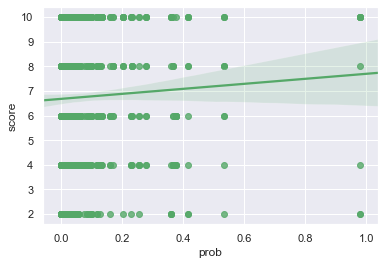

In [25]:
# put a linear regression through this. 

import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=res['prob'], y=res['score'], color="g")


Text(0, 0.5, 'Score')

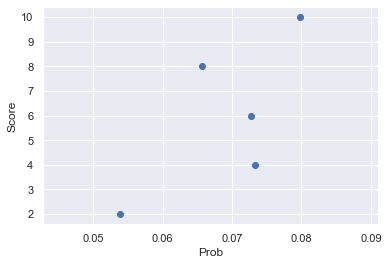

In [27]:
means = res.groupby('score').mean()
plt.scatter(means['prob'], means.index)
plt.xlabel('Prob')
plt.ylabel('Score')

# What surveyors should I pay?

## What is the correlation matrix between them? 

In [74]:
user_vectors = []
for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]['score'].astype(int)
    # normalize to the unit vector
    #print(np.dot(single_u,single_u))
    single_u = single_u/ np.sqrt(np.dot(single_u,single_u))
    #print(np.sqrt(np.dot(single_u,single_u)))
    user_vectors.append(single_u)
user_vectors = np.asarray(user_vectors) # each user is a row

In [76]:
u_corr = np.corrcoef(user_vectors)
u_corr

array([[ 1.        , -0.0772823 ,  0.50467465,  0.07012425, -0.00531507,
         0.65547613,  0.59048195,  0.05485984,  0.0071768 ,  0.25125409],
       [-0.0772823 ,  1.        ,  0.04816826, -0.02069274,  0.1724028 ,
        -0.09465117, -0.10409674,  0.08697756,  0.02511068,  0.11815932],
       [ 0.50467465,  0.04816826,  1.        , -0.01180481,  0.19035909,
         0.60621704,  0.42932727,  0.08429696,  0.10318701,  0.10668666],
       [ 0.07012425, -0.02069274, -0.01180481,  1.        ,  0.1079078 ,
        -0.05772881,  0.07945831,  0.04975144,  0.01652465, -0.12986671],
       [-0.00531507,  0.1724028 ,  0.19035909,  0.1079078 ,  1.        ,
         0.07519697,  0.02209841,  0.22776948,  0.10990515,  0.11338588],
       [ 0.65547613, -0.09465117,  0.60621704, -0.05772881,  0.07519697,
         1.        ,  0.54320617,  0.09152506,  0.11465768,  0.18987409],
       [ 0.59048195, -0.10409674,  0.42932727,  0.07945831,  0.02209841,
         0.54320617,  1.        ,  0.07567662

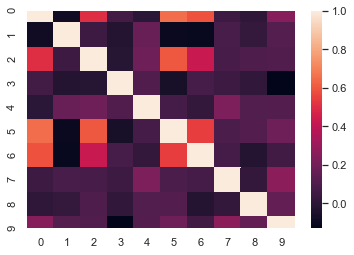

In [77]:
sns.heatmap(u_corr)

2, 5 and 6 all correlate well. This is the same as those that have high internal consistency (and also happen to give the highest scores). 6 is from Sacramento. 5 is from Houston. 2 is outside of Sacramento. 0 is from palm bay florida. and was almost internally consistent enough. correlated well with some of the others. 

In [82]:
mturk[['LocationLatitude',
 'LocationLongitude', 'Q22', 'Random ID']]

,LocationLatitude,LocationLongitude,Q22,Random ID
0,28.206207275390625,-80.68740081787109375,NaN,99887
1,13.087799072265625,80.27850341796875,i like to do this type of work in future,52503
2,39.5272064208984375,-119.91290283203125,Thank you,56916
3,13.087799072265625,80.27850341796875,A22CN9X0JP1HM4,92914
4,13.087799072265625,80.27850341796875,NICE,64874
5,29.691802978515625,-95.6526031494140625,No comments,79189
6,37.675201416015625,-120.946502685546875,no,96192
7,13.087799072265625,80.27850341796875,A3PWNN3ITRK4X3,75978
8,13.087799072265625,80.27850341796875,A3HZEWILX5PQSJ,26893
9,13.087799072265625,80.27850341796875,IT IS INFORMATIVE,18522


In [ ]:
mturk[['LocationLatitude',
 'LocationLongitude', 'Random ID']]

## Looking at the scores from each one: 

user ind: 0


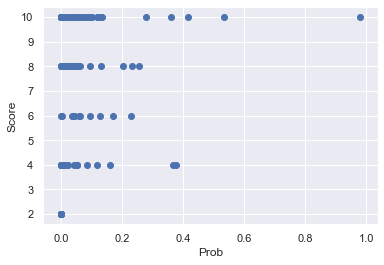

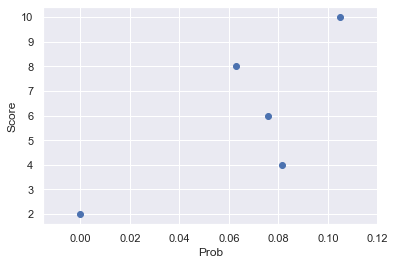

user ind: 1


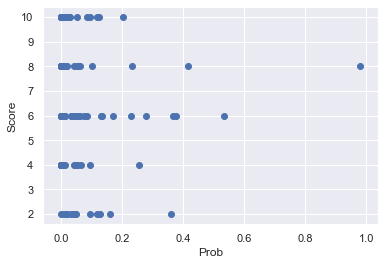

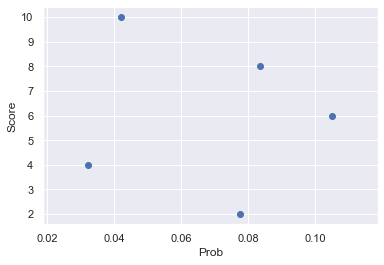

user ind: 2


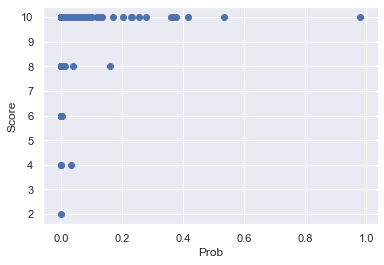

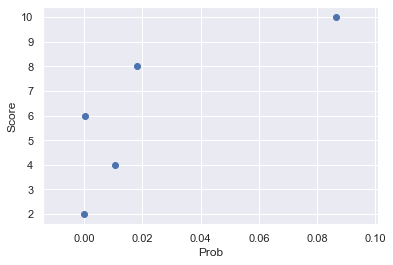

user ind: 3


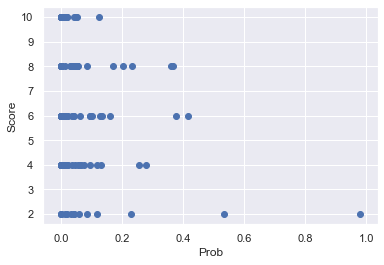

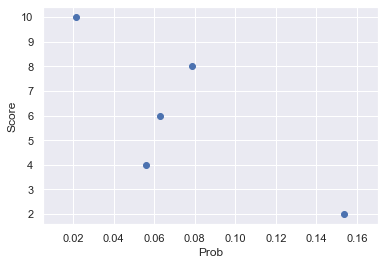

user ind: 4


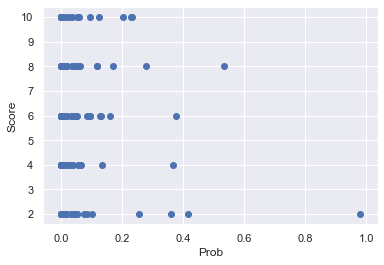

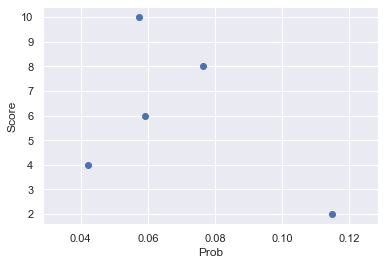

user ind: 5


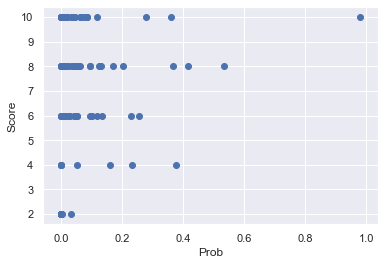

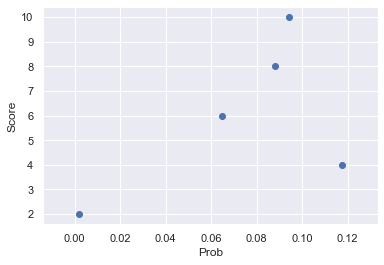

user ind: 6


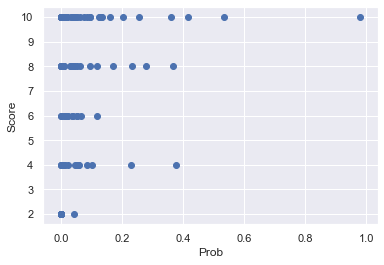

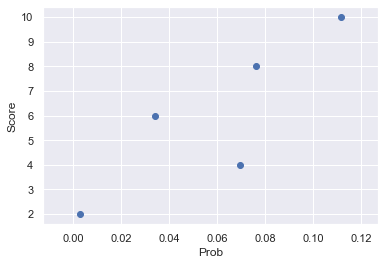

user ind: 7


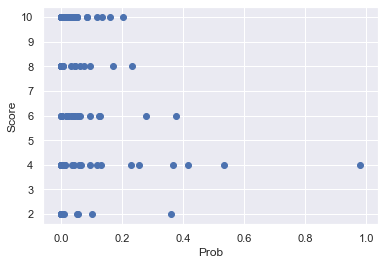

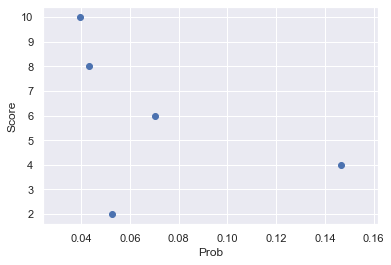

user ind: 8


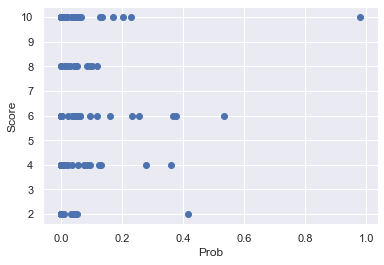

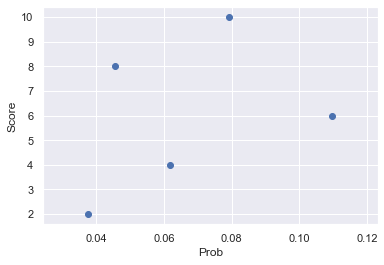

user ind: 9


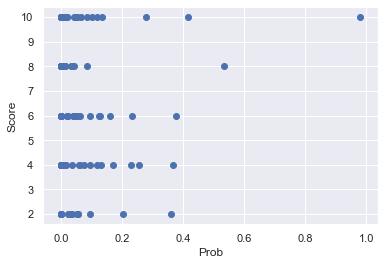

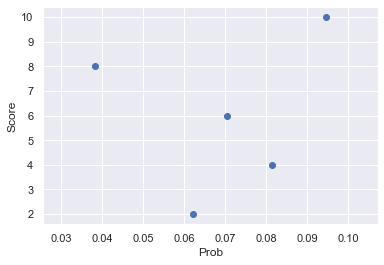

In [28]:
for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    print('user ind:', user_ind)
    #overall output
    plt.scatter(single_u['prob'], single_u['score'])
    plt.xlabel('Prob')
    plt.ylabel('Score')
    plt.show()
    #mean output
    means = single_u.groupby('score').mean()
    plt.scatter(means['prob'], means.index)
    plt.xlabel('Prob')
    plt.ylabel('Score')
    plt.show()
    #did they get the same words with the same score? 
    
    
    


In [30]:
single_u[single_u['q_ind']==0]['word'].duplicated(keep=False)

945    False
946    False
947    False
948     True
949    False
950     True
951    False
Name: word, dtype: bool

In [87]:
def dup_in_col(x):
    dupe_mask = x['word'].duplicated(keep=False)
    dupe_words = x['word'][dupe_mask]
    #print(dupe_words)
    for w in dupe_words.unique().tolist():
        same_prob = len(x[x['word']==w]['score'].unique().tolist())==1
        #print(x[x['word']==w]['score'])
        #print('same score', same_prob)
        if same_prob: 
            continue
        else: 
            return False
    return True

bad_users = []

for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    same_probs = single_u.groupby('q_ind').apply(dup_in_col )
    int_cons = same_probs.sum() == len(same_probs)
    perc_int_cons = same_probs.sum()/len(same_probs)
    
    print('user ind', user_ind, '| internal consistent?', int_cons, '| percent int con', perc_int_cons)
    
    if perc_int_cons< 0.9:
        bad_users.append(user_ind)
bad_users

user ind 0 | internal consistent? False | percent int con 0.8666666666666667
user ind 1 | internal consistent? False | percent int con 0.6
user ind 2 | internal consistent? False | percent int con 0.9333333333333333
user ind 3 | internal consistent? False | percent int con 0.6
user ind 4 | internal consistent? False | percent int con 0.6
user ind 5 | internal consistent? False | percent int con 0.9333333333333333
user ind 6 | internal consistent? False | percent int con 0.9333333333333333
user ind 7 | internal consistent? False | percent int con 0.8666666666666667
user ind 8 | internal consistent? False | percent int con 0.5333333333333333
user ind 9 | internal consistent? False | percent int con 0.6666666666666666


[0, 1, 3, 4, 7, 8, 9]

In [49]:
good_users = list(set(res['user_ind'].unique().tolist())-set(bad_users))
good_users

[2, 5, 6]

### How did they rate the ground truth words? 

In [94]:
g_truth = pickle.load(open('prob_slice_replaceable_comparisons_answers_list.pickle','rb'))
all_gwords = []
for q in g_truth: 
    for e in q:
        if e[2]==1:
            all_gwords.append(e[0].strip())

In [95]:
all_gwords

['events',
 'would',
 'edge',
 'a',
 'creek',
 'is',
 'adept',
 'shock',
 'the',
 'novel',
 'secretaries',
 'technology',
 'Jews',
 'trade',
 'his',
 'his',
 'told',
 'smile',
 'we']

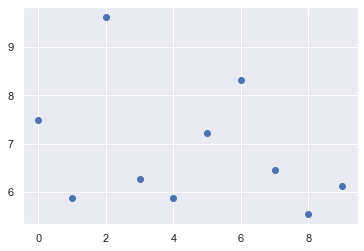

In [98]:
mean_gw_scores = []
for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    gw_mask = single_u['word'].apply(lambda x: x in all_gwords)
    gw_scores = single_u[gw_mask]['score']
    #print('user ind', user_ind, 'mean g word score', gw_scores.mean(), 'scores for ground words', gw_scores)
    mean_gw_scores.append(gw_scores.mean())
plt.scatter(range(len(mean_gw_scores)), mean_gw_scores)

#### all of the good ones in this case are above 7 as they should be for the ground words. 

In [50]:
mturk.loc[9, 'Random ID']

'18522'

## removing words where their prob is different with or without a space!
#### Should have fixed the encoding so that this will no longer be a problem going forwards

In [100]:
res.head()

,user_ind,q_ind,word,prob,score
0,0,0,event,2.130662e-03,6
1,0,0,things,7.781028e-04,8
2,0,0,bad,4.916115e-04,2
3,0,0,events,4.103564e-07,10
4,0,0,circumstances,5.090322e-04,10


In [132]:
mask = res['word']=='events'
res[mask]['prob']

3      4.103564e-07
5      9.782679e-01
108    4.103564e-07
110    9.782679e-01
213    4.103564e-07
215    9.782679e-01
318    4.103564e-07
320    9.782679e-01
423    4.103564e-07
425    9.782679e-01
528    4.103564e-07
530    9.782679e-01
633    4.103564e-07
635    9.782679e-01
738    4.103564e-07
740    9.782679e-01
843    4.103564e-07
845    9.782679e-01
948    4.103564e-07
950    9.782679e-01
Name: prob, dtype: float64

In [143]:
def gword_same_prob(x):
    #print(x.index)
    rows_to_drop = []
    dupe_mask = x['word'].duplicated(keep=False)
    dupe_words = x['word'][dupe_mask]
    #print(dupe_words)
    for w in dupe_words.unique().tolist():
        same_prob = len(x[x['word']==w]['prob'].unique().tolist())==1
        #print(x[x['word']==w]['score'])
        #print('same score', same_prob)
        if not same_prob: 
            ind_mask = mask = x['word']==w
            # drop the smaller one
            smaller = np.argmin(x[ind_mask]['prob'])
            rows_to_drop.append( smaller )
            # np.arange(len(x['word']))

            
    return rows_to_drop

res_rows_to_drop = res.groupby('q_ind').apply(gword_same_prob)
res_rows_to_drop #= res_rows_to_drop.ravel().flatten()



q_ind
0       [3]
1       [8]
2      [20]
3      [24]
4        []
5      [40]
6        []
7        []
8      [59]
9        []
10       []
11       []
12       []
13       []
14    [101]
dtype: object

In [144]:
temp_rtod = []
for r in res_rows_to_drop:
    try:
        temp_rtod.append(r[0])
    except:
        pass
res_rows_to_drop = np.asarray(temp_rtod)
res_rows_to_drop

array([  3,   8,  20,  24,  40,  59, 101])

In [146]:
c_res = res.drop(res_rows_to_drop, axis=0,)

# Plots without the bad users

In [147]:
guser_mask = c_res['user_ind'].apply(lambda x: x in good_users)
guser = c_res[guser_mask]

In [150]:
guser.shape

(315, 5)

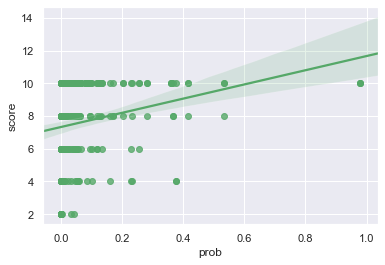

In [148]:
# put a linear regression through this. 



import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=guser['prob'], y=guser['score'], color="g")


Text(0, 0.5, 'Score')

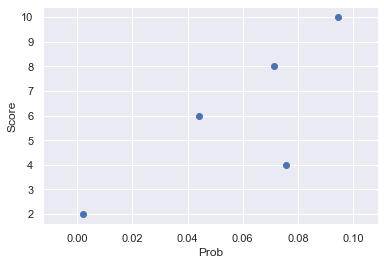

In [149]:
means = guser.groupby('score').mean()
plt.scatter(means['prob'], means.index)
plt.xlabel('Prob')
plt.ylabel('Score')